In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [60]:
data = pd.read_csv('./data/supermarket_data_cleaned.csv')
data

,Customer_ID,Age,Education,Num_children,Has_partner,Family_size,Is_parent,Income,Recency,Total_spent,...,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Num_offers_accepted
0,N1,58,1,0,0,1,0,58138,58,1617,...,546,172,88,88,3,8,10,4,7,0
1,N2,61,1,2,0,3,1,46344,38,27,...,6,2,1,6,2,1,1,2,5,0
2,N3,50,1,0,1,2,0,71613,26,776,...,127,111,21,42,1,8,2,10,4,0
3,N4,31,1,1,1,3,1,26646,26,53,...,20,10,3,5,2,2,0,4,6,0
4,N5,34,2,1,1,3,1,58293,94,422,...,118,46,27,15,5,5,3,6,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,N2208,48,1,1,1,3,1,61223,46,1341,...,182,42,118,247,2,9,3,4,5,0
2208,N2209,69,2,3,1,5,1,64014,56,444,...,30,0,0,8,7,8,2,5,7,1
2209,N2210,34,1,0,0,1,0,56981,91,1241,...,217,32,12,24,1,2,3,13,6,1
2210,N2211,59,2,1,1,3,1,69245,8,843,...,214,80,30,61,2,6,5,10,3,0


In [62]:
data.columns

Index(['Customer_ID', 'Age', 'Education', 'Num_children', 'Has_partner',
       'Family_size', 'Is_parent', 'Income', 'Recency', 'Total_spent',
       'Total_num_purchase', 'Register_days', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Num_offers_accepted'],
      dtype='object')

In [64]:
columns_to_drop = ['Customer_ID']
data = data.drop(columns=columns_to_drop)

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2212 entries, 0 to 2211
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Age                  2212 non-null   int64
 1   Education            2212 non-null   int64
 2   Num_children         2212 non-null   int64
 3   Has_partner          2212 non-null   int64
 4   Family_size          2212 non-null   int64
 5   Is_parent            2212 non-null   int64
 6   Income               2212 non-null   int64
 7   Recency              2212 non-null   int64
 8   Total_spent          2212 non-null   int64
 9   Total_num_purchase   2212 non-null   int64
 10  Register_days        2212 non-null   int64
 11  MntWines             2212 non-null   int64
 12  MntFruits            2212 non-null   int64
 13  MntMeatProducts      2212 non-null   int64
 14  MntFishProducts      2212 non-null   int64
 15  MntSweetProducts     2212 non-null   int64
 16  MntGoldProds         221

In [68]:
data.describe()

,Age,Education,Num_children,Has_partner,Family_size,Is_parent,Income,Recency,Total_spent,Total_num_purchase,...,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Num_offers_accepted
count,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,...,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000
mean,46.086347,1.268083,0.947559,0.645570,2.593128,0.714286,51958.810579,49.019439,607.268083,12.566908,...,167.029837,37.648734,27.046564,43.925859,2.324593,4.088156,2.672242,5.806510,5.321429,0.298373
std,11.701599,0.651348,0.749466,0.478449,0.906236,0.451856,21527.278844,28.943121,602.513364,7.205427,...,224.254493,54.772033,41.090991,51.706981,1.924507,2.742187,2.927542,3.250939,2.425597,0.679570
min,19.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1730.000000,0.000000,5.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,38.000000,1.000000,0.000000,0.000000,2.000000,0.000000,35233.500000,24.000000,69.000000,6.000000,...,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000
50%,45.000000,1.000000,1.000000,1.000000,3.000000,1.000000,51371.000000,49.000000,397.000000,12.000000,...,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000
75%,56.000000,2.000000,1.000000,1.000000,3.000000,1.000000,68487.000000,74.000000,1048.000000,18.250000,...,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000
max,75.000000,2.000000,3.000000,1.000000,5.000000,1.000000,162397.000000,99.000000,2525.000000,32.000000,...,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,4.000000


In [70]:
data.columns

Index(['Age', 'Education', 'Num_children', 'Has_partner', 'Family_size',
       'Is_parent', 'Income', 'Recency', 'Total_spent', 'Total_num_purchase',
       'Register_days', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Num_offers_accepted'],
      dtype='object')

Income: The income level directly influences customers’ consumption ability and willingness to consume. High - income customers tend to purchase high - priced or high - end products, while low - income customers are more price - sensitive.  

Total_spent: It reflects the overall value of customers. Customers with high total spending are significant profit sources for enterprises. Combined with income, it can analyze the matching degree between consumption potential and actual consumption.  

Recency: It measures customer activity. Customers with a recent purchase time are more likely to maintain consumption habits and have a higher responsiveness to marketing activities.  

NumStorePurchases: It demonstrates customers’ preference for offline channels. Customers with a high number of store purchases may attach more importance to offline experiences, allowing for targeted optimization of offline services.  

MntWines and MntFruits: They represent customers’ consumption preferences for specific product categories, facilitating the targeted promotion of relevant product promotional activities.

In [73]:
features = data[['Income','Total_spent','Recency','NumStorePurchases','MntWines','MntFruits']]

In [75]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

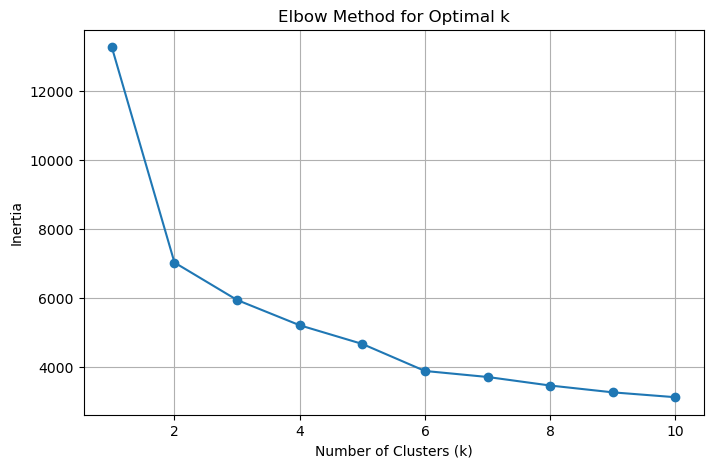

In [77]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, 'o-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [78]:
# Based on the elbow plot, choose the appropriate number of clusters
optimal_k = 6  # Example value; adjust after viewing the elbow plot

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

# Add the cluster labels to the original data
data['Cluster'] = clusters

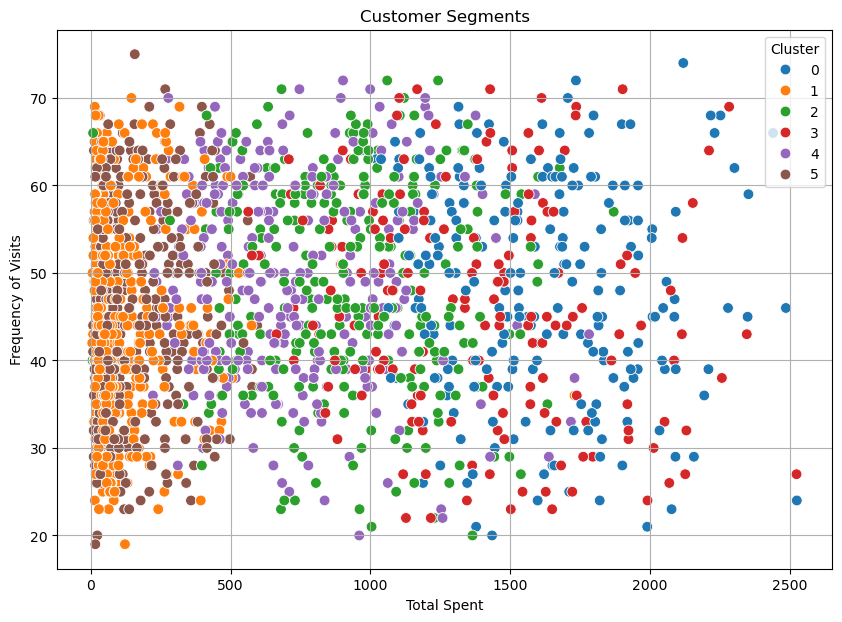

In [81]:
# Plot the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='Total_spent',
    y='Age',
    hue='Cluster',
    palette='tab10',
    data=data,
    s=60
)
plt.title('Customer Segments')
plt.xlabel('Total Spent')
plt.ylabel('Frequency of Visits')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [82]:
# Group by cluster to observe differences
numeric_cols = data.select_dtypes(include='number').columns
summary = data.groupby('Cluster')[numeric_cols].mean()
summary

,Age,Education,Num_children,Has_partner,Family_size,Is_parent,Income,Recency,Total_spent,Total_num_purchase,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Num_offers_accepted,Cluster
Cluster,,,,,,,,,,,,,,,,,,,,,
0,48.203252,1.536585,0.495935,0.642276,2.138211,0.439024,75014.528455,44.146341,1607.264228,20.211382,...,68.776423,49.784553,71.825203,2.032520,5.967480,5.569106,8.674797,4.333333,1.109756,0.0
1,43.136691,1.192446,1.203237,0.660072,2.863309,0.868705,33206.348921,25.113309,108.206835,6.064748,...,8.397482,4.762590,18.829137,2.125899,2.276978,0.629496,3.158273,6.620504,0.104317,1.0
2,48.744548,1.355140,0.688474,0.616822,2.305296,0.585670,67437.669782,75.704050,938.006231,18.616822,...,56.943925,42.183801,65.906542,2.504673,5.582555,4.423676,8.610592,3.937695,0.320872,2.0
3,45.586735,1.086735,0.311224,0.622449,1.933673,0.285714,74406.005102,47.719388,1372.642857,19.903061,...,116.408163,82.336735,86.142857,1.561224,5.576531,5.744898,8.581633,3.117347,0.510204,3.0
4,49.087613,1.305136,0.909366,0.661631,2.570997,0.734139,63358.175227,24.045317,720.314199,17.141994,...,47.148036,34.338369,57.516616,3.036254,5.818731,3.646526,7.676737,4.631420,0.241692,4.0
5,44.966192,1.217082,1.284698,0.647687,2.932384,0.893238,37035.516014,74.724199,140.862989,6.944840,...,8.879004,6.916370,21.259786,2.393238,2.665480,0.779359,3.500000,6.434164,0.081851,5.0
